<a href="https://colab.research.google.com/github/sanjanasrinivas22/6thSem-ML-Lab/blob/main/1BM23CS301_Lab_4_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2 

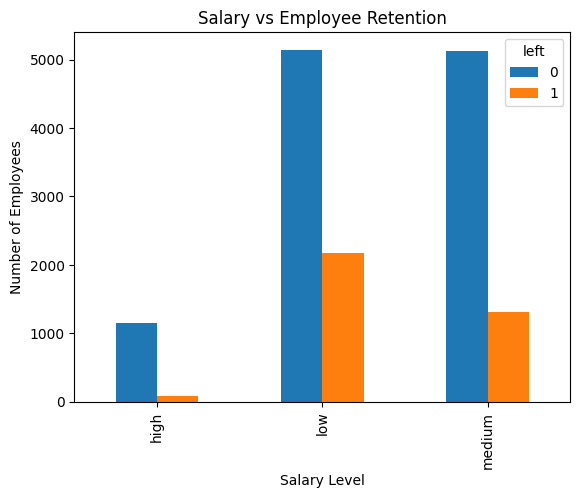

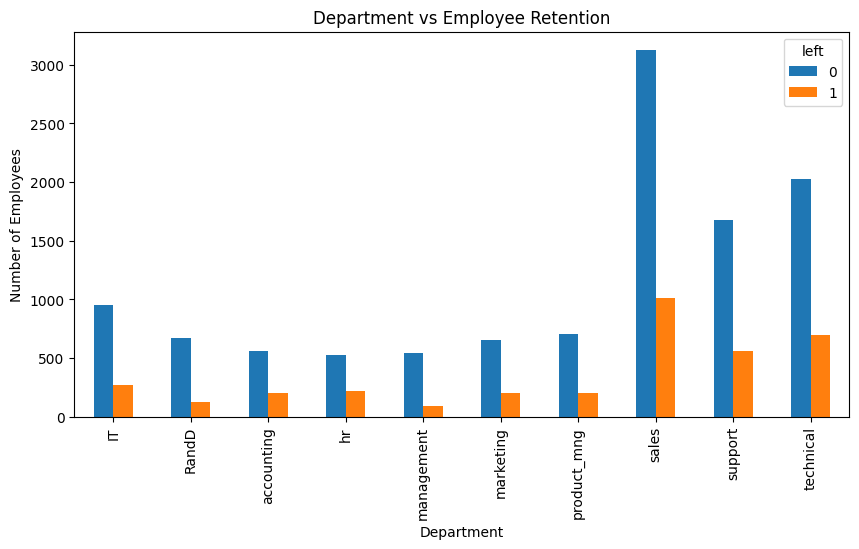

Accuracy: 0.7728888888888888
Confusion Matrix:
[[3221  207]
 [ 815  257]]


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Load dataset
df = pd.read_csv("HR_comma_sep.csv")

# ---------------------------
# 1. Exploratory Data Analysis
# ---------------------------

print(df.head())
print(df.groupby('left').mean(numeric_only=True))

# ---------------------------
# 2. Salary vs Retention
# ---------------------------

salary_retention = pd.crosstab(df.salary, df.left)
salary_retention.plot(kind='bar')
plt.title("Salary vs Employee Retention")
plt.xlabel("Salary Level")
plt.ylabel("Number of Employees")
plt.show()

# ---------------------------
# 3. Department vs Retention
# ---------------------------

dept_retention = pd.crosstab(df.Department, df.left)
dept_retention.plot(kind='bar', figsize=(10,5))
plt.title("Department vs Employee Retention")
plt.xlabel("Department")
plt.ylabel("Number of Employees")
plt.show()

# ---------------------------
# 4. Build Logistic Model
# ---------------------------

# Selecting important variables
df['salary'] = df['salary'].map({'low':0, 'medium':1, 'high':2})

X = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
y = df['left']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)

# ---------------------------
# 5. Accuracy
# ---------------------------

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test,y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test,y_pred))

  animal_name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0    aardvark     1         0     0     1         0        0         1   
1    antelope     1         0     0     1         0        0         0   
2        bass     0         0     1     0         0        1         1   
3        bear     1         0     0     1         0        0         1   
4        boar     1         0     0     1         0        0         1   

   toothed  backbone  breathes  venomous  fins  legs  tail  domestic  catsize  \
0        1         1         1         0     0     4     0         0        1   
1        1         1         1         0     0     4     1         0        1   
2        1         1         0         0     1     0     1         0        0   
3        1         1         1         0     0     4     0         0        1   
4        1         1         1         0     0     4     1         0        1   

   class_type  
0           1  
1           1  
2           4  
3   

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


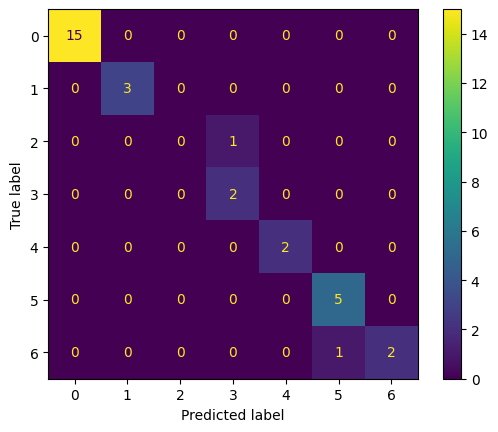

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Load dataset
zoo = pd.read_csv("zoo-data.csv")
class_type = pd.read_csv("zoo-class-type.csv")

print(zoo.head())

# ---------------------------
# 1. Data Preprocessing
# ---------------------------

# Drop animal name column
zoo = zoo.drop(columns=['animal_name'])

# Separate features and target
X = zoo.drop(columns=['class_type'])
y = zoo['class_type']

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

# ---------------------------
# 2. Build Logistic Regression Model
# ---------------------------

model = LogisticRegression(max_iter=2000, multi_class='multinomial')
model.fit(X_train,y_train)

# ---------------------------
# 3. Accuracy
# ---------------------------

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test,y_pred))

# ---------------------------
# 4. Confusion Matrix
# ---------------------------

cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("HR_comma_sep.csv")

# Convert salary to numeric
df['salary'] = df['salary'].map({'low':0, 'medium':1, 'high':2})

# Select features
X = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']].values
y = df['left'].values.reshape(-1,1)

# Normalize features
X = (X - X.mean(axis=0)) / X.std(axis=0)

# Add bias term
X = np.hstack((np.ones((X.shape[0],1)), X))

# Initialize parameters
weights = np.zeros((X.shape[1],1))
lr = 0.01
epochs = 1000

# Sigmoid function
def sigmoid(z):
    return 1/(1+np.exp(-z))

# Gradient Descent
for i in range(epochs):
    z = np.dot(X, weights)
    y_pred = sigmoid(z)
    gradient = np.dot(X.T, (y_pred - y)) / len(y)
    weights -= lr * gradient

# Predictions
z = np.dot(X, weights)
y_pred = sigmoid(z)
y_pred_class = (y_pred >= 0.5).astype(int)

# Accuracy
accuracy = np.mean(y_pred_class == y)
print("Accuracy:", accuracy)

Accuracy: 0.7832522168144543


In [10]:
import pandas as pd
import numpy as np

# Load dataset
zoo = pd.read_csv("zoo-data.csv")

# Drop animal name
zoo = zoo.drop(columns=['animal_name'])

X = zoo.drop(columns=['class_type']).values
y = zoo['class_type'].values

# Normalize features
X = (X - X.mean(axis=0)) / X.std(axis=0)

# Add bias
X = np.hstack((np.ones((X.shape[0],1)), X))

# One-hot encoding
classes = np.unique(y)
k = len(classes)
y_onehot = np.zeros((len(y), k))

for i in range(len(y)):
    y_onehot[i, y[i]-1] = 1

# Initialize weights
weights = np.zeros((X.shape[1], k))
lr = 0.01
epochs = 2000

# Softmax function
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

# Gradient Descent
for i in range(epochs):
    z = np.dot(X, weights)
    y_pred = softmax(z)
    gradient = np.dot(X.T, (y_pred - y_onehot)) / len(y)
    weights -= lr * gradient

# Predictions
z = np.dot(X, weights)
y_pred = softmax(z)
y_pred_class = np.argmax(y_pred, axis=1) + 1

# Accuracy
accuracy = np.mean(y_pred_class == y)
print("Accuracy:", accuracy)

Accuracy: 1.0
